## Telecom chrun case study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, **telecom companies need to predict which customers are at high risk of churn.**




#### Import necessery libraries:

In [1163]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Set the session options
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [1164]:
pd.read_csv('data_dictionary.csv')

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

### Data understanding:

In [1165]:
telecom_data = pd.read_csv('train.csv')
telecom_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109            0.00            0.00            0.00   
1   1        109            0.00            0.00            0.00   
2   2        109            0.00            0.00            0.00   
3   3        109            0.00            0.00            0.00   
4   4        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.28   
1            6/30/2014            7/31/2014            8/31/2014    0.00   
2            6/30/2014            7/31/2014            8/31/2014   60.81   
3            6/30/2014            7/31/2014            8/31/2014  156.36   
4            6/30/2014            7/31/2014            8/31/2014  240.71   

   arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.01    7.53        48.58       124.38         1.29         32.24   
1  122.79   42.95         0.00         0.00         0.00          0.00   
2  103.18    0.00         0.53        15.93         0.00         53.99   
3  205.26  111.09         7.26        16.01         0.00         68.76   
4  128.19  101.56        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00           0.00           0.00   
1         25.99         30.89           0.00           0.00           0.00   
2         82.05          0.00           0.00           0.00           0.00   
3         78.48         50.23           0.00           0.00           0.00   
4         38.11          9.63          53.64           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              2.23   
1           0.00           0.00           0.00              0.00   
2           0.00           0.00           0.00              0.53   
3           0.00           0.00           1.63              6.99   
4          15.73           0.00           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mo

In [1166]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [1167]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(telecom_data.describe())

             id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count 69,999.00  69,999.00       69,297.00       69,297.00       69,297.00   
mean  34,999.00     109.00            0.00            0.00            0.00   
std   20,207.12       0.00            0.00            0.00            0.00   
min        0.00     109.00            0.00            0.00            0.00   
25%   17,499.50     109.00            0.00            0.00            0.00   
50%   34,999.00     109.00            0.00            0.00            0.00   
75%   52,498.50     109.00            0.00            0.00            0.00   
max   69,998.00     109.00            0.00            0.00            0.00   

         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 69,999.00 69,999.00 69,999.00    67,231.00    67,312.00    66,296.00   
mean     283.13    278.19    278.86       133.15       133.89       132.98   
std      334.21    344.37    351.92       299.96       311.28  

In [1168]:
telecom_data.shape

(69999, 172)

In [1169]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

In [1170]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

arpu_3g_6                  0.75
count_rech_2g_6            0.75
night_pck_user_6           0.75
arpu_2g_6                  0.75
date_of_last_rech_data_6   0.75
total_rech_data_6          0.75
av_rech_amt_data_6         0.75
max_rech_data_6            0.75
count_rech_3g_6            0.75
fb_user_6                  0.75
night_pck_user_7           0.74
date_of_last_rech_data_7   0.74
total_rech_data_7          0.74
max_rech_data_7            0.74
fb_user_7                  0.74
count_rech_2g_7            0.74
count_rech_3g_7            0.74
arpu_3g_7                  0.74
av_rech_amt_data_7         0.74
arpu_2g_7                  0.74
count_rech_2g_8            0.74
av_rech_amt_data_8         0.74
night_pck_user_8           0.74
max_rech_data_8            0.74
total_rech_data_8          0.74
arpu_2g_8                  0.74
arpu_3g_8                  0.74
date_of_last_rech_data_8   0.74
fb_user_8                  0.74
count_rech_3g_8            0.74
isd_og_mou_8               0.05
std_ic_t

In [1171]:
telecom_data['good_phase_recharge'] = telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7']

### Data preparation, Cleaning & Feature engineering:

In [1172]:
seventy_percentile = int(telecom_data['good_phase_recharge'].quantile(.70))
telecom_data = telecom_data[(telecom_data.good_phase_recharge > seventy_percentile)]
telecom_data.shape

(20951, 173)

In [1173]:
null_values_per = get_null_percentage(telecom_data)
null_values_per

count_rech_3g_6            0.62
av_rech_amt_data_6         0.62
max_rech_data_6            0.62
count_rech_2g_6            0.62
arpu_3g_6                  0.62
date_of_last_rech_data_6   0.62
night_pck_user_6           0.62
total_rech_data_6          0.62
arpu_2g_6                  0.62
fb_user_6                  0.62
av_rech_amt_data_7         0.61
night_pck_user_7           0.61
count_rech_3g_7            0.61
total_rech_data_7          0.61
arpu_2g_7                  0.61
count_rech_2g_7            0.61
date_of_last_rech_data_7   0.61
max_rech_data_7            0.61
fb_user_7                  0.61
arpu_3g_7                  0.61
night_pck_user_8           0.61
date_of_last_rech_data_8   0.61
total_rech_data_8          0.61
fb_user_8                  0.61
count_rech_2g_8            0.61
arpu_3g_8                  0.61
av_rech_amt_data_8         0.61
count_rech_3g_8            0.61
arpu_2g_8                  0.61
max_rech_data_8            0.61
loc_ic_mou_8               0.03
loc_ic_t

In [1174]:
filtered_columns = list(null_values_per[null_values_per < 0.6].index) 

In [1175]:
filtered_data = telecom_data[filtered_columns]
filtered_data.head()

loc_ic_mou_8  loc_ic_t2f_mou_8  spl_og_mou_8  std_ic_mou_8  \
12         24.53              0.00          0.00          2.46   
15        629.94              8.88          0.00          0.00   
23        202.89             23.66          0.01          0.00   
24        171.01              1.13          0.36         21.93   
25        425.58             11.24         25.24         10.04   

    std_ic_t2t_mou_8  isd_og_mou_8  std_ic_t2m_mou_8  std_og_mou_8  \
12              0.00          0.00              2.46        632.18   
15              0.00          0.00              0.00          6.26   
23              0.00          0.00              0.00          0.00   
24              0.00          0.00             21.93        121.79   
25              0.15          0.00              9.89        416.99   

    std_ic_t2f_mou_8  og_others_8  std_og_t2c_mou_8  std_ic_t2o_mou_8  \
12              0.00         0.00              0.00              0.00   
15              0.00         0.00              0.00              0.00   
23              0.00         0.00              0.00              0.00   
24              0.00         0.00              0.00              0.00   
25              0.00         0.00              0.00              0.00   

    std_og_t2f_mou_8  loc_og_t2c_mou_8  loc_ic_t2t_mou_8  loc_og_t2t_mou_8  \
12              0.00              0.00              1.06              3.98   
15              6.26              0.00            335.43            194.43   
23              0.00              0.00             30.39              0.89   
24              0.00              0.36             19.14             29.86   
25              0.00              7.01             95.31             81.86   

    loc_og_t2f_mou_8  loc_ic_t2m_mou_8  std_og_t2m_mou_8  ic_others_8  \
12              0.00             23.46            593.18         0.00   
15              4.94            285.63              0.00         0.00   
23              8.88            148.83              0.00         0.40   
24              0.00            150.73            121.79         0.00   
25              0.36            319.01            301.31         0.00   

    roam_og_mou_8  loc_og_mou_8  roam_ic_mou_8  isd_ic_mou_8  \
12           0.00         55.23           0.00          0.00   
15           0.00        385.26           0.00          0.00   
23           0.00        387.79           0.00          0.00   
24           0.00        129.73           0.00          0.00   
25           0.00        311.91           0.00         19.28   

    std_og_t2t_mou_8  offnet_mou_8  onnet_mou_8  spl_ic_mou_8  \
12             38.99        644.43        42.98          0.00   
15              0.00        197.09       194.43          0.00   
23              0.00        386.91         0.89          0.00   
24              0.00        222.03        29.86          0.00   
25            115.68        556.61       197.54          0.00   

    loc_og_t2m_mou_8 date_of_last_rech_8  loc_ic_mou_6  spl_ic_mou_6  \
12             51.24           8/30/2014         26.93          0.00   
15            185.88           8/30/2014        233.18          0.00   
23            378.01           8/22/2014        391.38          0.13   
24             99.86           8/30/2014        223.11          0.00   
25            229.68           8/30/2014        370.73          0.00   

    std_ic_t2t_mou_6  std_ic_t2f_mou_6  ic_others_6  isd_ic_mou_6  \
12              0.23              0.00         0.00          0.00   
15              0.00              0.00         0.00          0.00   
23              0.00              0.00         0.00          0.00   
24              0.00              0.00         0.00          0.00   
25              0.00              0.76         0.00          4.01   

    std_ic_mou_6  std_ic_t2m_mou_6  std_ic_t2o_mou_6  loc_ic_t2f_mou_6  \
12          7.56              7.33              0.00              0.00   
15          0.00              0.00              0.00              0

In [1176]:
get_null_percentage(filtered_data)

loc_ic_mou_8           0.03
loc_og_t2t_mou_8       0.03
loc_ic_t2f_mou_8       0.03
loc_og_t2m_mou_8       0.03
spl_ic_mou_8           0.03
onnet_mou_8            0.03
offnet_mou_8           0.03
std_og_t2t_mou_8       0.03
isd_ic_mou_8           0.03
loc_og_mou_8           0.03
roam_og_mou_8          0.03
ic_others_8            0.03
std_og_t2m_mou_8       0.03
loc_ic_t2m_mou_8       0.03
loc_og_t2f_mou_8       0.03
roam_ic_mou_8          0.03
loc_ic_t2t_mou_8       0.03
std_og_mou_8           0.03
loc_og_t2c_mou_8       0.03
std_ic_mou_8           0.03
std_ic_t2t_mou_8       0.03
isd_og_mou_8           0.03
std_ic_t2m_mou_8       0.03
spl_og_mou_8           0.03
std_ic_t2f_mou_8       0.03
og_others_8            0.03
std_og_t2c_mou_8       0.03
std_ic_t2o_mou_8       0.03
std_og_t2f_mou_8       0.03
date_of_last_rech_8    0.02
offnet_mou_6           0.01
loc_og_t2f_mou_6       0.01
std_og_mou_6           0.01
loc_og_t2m_mou_6       0.01
isd_og_mou_6           0.01
std_og_t2t_mou_6    

In [1177]:
# filtered_data.apply(pd.value_counts)

filtered_data.describe()

loc_ic_mou_8  loc_ic_t2f_mou_8  spl_og_mou_8  std_ic_mou_8  \
count     20,299.00         20,299.00     20,299.00     20,299.00   
mean         239.75             15.26          7.13         48.99   
std          302.56             44.71         22.81        134.39   
min            0.00              0.00          0.00          0.00   
25%           57.49              0.00          0.00          2.06   
50%          150.29              2.11          0.68         13.63   
75%          309.27             12.31          6.66         45.10   
max        5,748.81          1,588.53        954.51      3,777.94   

       std_ic_t2t_mou_8  isd_og_mou_8  std_ic_t2m_mou_8  std_og_mou_8  \
count         20,299.00     20,299.00         20,299.00     20,299.00   
mean              15.38          2.29             30.90        369.01   
std               70.41         52.92             97.45        622.14   
min                0.00          0.00              0.00          0.00   
25%                0.00          0.00              0.25          3.21   
50%                0.78          0.00              6.36         88.78   
75%                9.38          0.00             26.67        510.87   
max            3,423.39      5,681.54          2,879.31     13,980.06   

       std_ic_t2f_mou_8  og_others_8  std_og_t2c_mou_8  std_ic_t2o_mou_8  \
count         20,299.00    20,299.00         20,299.00         20,299.00   
mean               2.71         0.06              0.00              0.00   
std               19.88         3.14              0.00              0.00   
min                0.00         0.00              0.00              0.00   
25%                0.00         0.00              0.00              0.00   
50%                0.00         0.00              0.00              0.00   
75%                0.24         0.00              0.00              0.00   
max            1,394.89       394.93              0.00              0.00   

       std_og_t2f_mou_8  loc_og_t2c_mou_8  loc_ic_t2t_mou_8  loc_og_t2t_mou_8  \
count         20,299.00         20,299.00         20,299.00         20,299.00   
mean               1.81              1.74             67.79             89.79   
std               11.29              7.40            158.87            243.90   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              8.24              7.16   
50%                0.00              0.00             28.43             30.73   
75%                0.00              0.10             72.63             87.09   
max              354.16            351.83          4,003.21         10,752.56   

       loc_og_t2f_mou_8  loc_ic_t2m_mou_8  std_og_t2m_mou_8  ic_others_8  \
count         20,299.00         20,299.00         20,299.00    20,299.00   
mean               6.69            156.69            188.21         1.30   
std               20.14            210.06            419.87        14.36   
min                0.00              0.00              0.00         0.00   
25%                0.00             34.42              0.51         0.00   
50%                0.30             94.31             27.99         0.00   
75%                4.91            201.25            179.59         0.08   
max              588.29          5,738.46         13,950.04     1,209.86   

       roam_og_mou_8  loc_og_mou_8  roam_ic_mou_8  isd_ic_mou_8  \
count      20,299.00     20,299.00      20,299.00     20,299.00   
mean           21.59        267.91          13.45         11.79   
std           107.76        370.30          76.62         71.57   
min             0.00          0.00           0.00          0.00   
25%             0.00         45.21           0.00          0.00   
50%             0.00        157.63           0.00          0.00   
75%             0.00        355.36           0.00          0.00   
max         5,337.04     11,039.91       4,169.81      3,432.88   

       std_og_t2t_mou_8

In [1178]:
# ===> Drop these columns as there is no change in the data overall
dropping_columns = [
    'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_8',
    'std_og_t2c_mou_8', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'loc_og_t2o_mou', 'std_og_t2o_mou',
    'loc_ic_t2o_mou', 'circle_id']
filtered_data = filtered_data.drop(columns=dropping_columns, axis=1)

In [1179]:
filtered_data.describe()

loc_ic_mou_8  loc_ic_t2f_mou_8  spl_og_mou_8  std_ic_mou_8  \
count     20,299.00         20,299.00     20,299.00     20,299.00   
mean         239.75             15.26          7.13         48.99   
std          302.56             44.71         22.81        134.39   
min            0.00              0.00          0.00          0.00   
25%           57.49              0.00          0.00          2.06   
50%          150.29              2.11          0.68         13.63   
75%          309.27             12.31          6.66         45.10   
max        5,748.81          1,588.53        954.51      3,777.94   

       std_ic_t2t_mou_8  isd_og_mou_8  std_ic_t2m_mou_8  std_og_mou_8  \
count         20,299.00     20,299.00         20,299.00     20,299.00   
mean              15.38          2.29             30.90        369.01   
std               70.41         52.92             97.45        622.14   
min                0.00          0.00              0.00          0.00   
25%                0.00          0.00              0.25          3.21   
50%                0.78          0.00              6.36         88.78   
75%                9.38          0.00             26.67        510.87   
max            3,423.39      5,681.54          2,879.31     13,980.06   

       std_ic_t2f_mou_8  og_others_8  std_og_t2f_mou_8  loc_og_t2c_mou_8  \
count         20,299.00    20,299.00         20,299.00         20,299.00   
mean               2.71         0.06              1.81              1.74   
std               19.88         3.14             11.29              7.40   
min                0.00         0.00              0.00              0.00   
25%                0.00         0.00              0.00              0.00   
50%                0.00         0.00              0.00              0.00   
75%                0.24         0.00              0.00              0.10   
max            1,394.89       394.93            354.16            351.83   

       loc_ic_t2t_mou_8  loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_ic_t2m_mou_8  \
count         20,299.00         20,299.00         20,299.00         20,299.00   
mean              67.79             89.79              6.69            156.69   
std              158.87            243.90             20.14            210.06   
min                0.00              0.00              0.00              0.00   
25%                8.24              7.16              0.00             34.42   
50%               28.43             30.73              0.30             94.31   
75%               72.63             87.09              4.91            201.25   
max            4,003.21         10,752.56            588.29          5,738.46   

       std_og_t2m_mou_8  ic_others_8  roam_og_mou_8  loc_og_mou_8  \
count         20,299.00    20,299.00      20,299.00     20,299.00   
mean             188.21         1.30          21.59        267.91   
std              419.87        14.36         107.76        370.30   
min                0.00         0.00           0.00          0.00   
25%                0.51         0.00           0.00         45.21   
50%               27.99         0.00           0.00        157.63   
75%              179.59         0.08           0.00        355.36   
max           13,950.04     1,209.86       5,337.04     11,039.91   

       roam_ic_mou_8  isd_ic_mou_8  std_og_t2t_mou_8  offnet_mou_8  \
count      20,299.00     20,299.00         20,299.00     20,299.00   
mean           13.45         11.79            178.99        388.04   
std            76.62         71.57            419.64        475.40   
min             0.00          0.00              0.00          0.00   
25%             0.00          0.00              0.00        108.57   
50%             0.00          0.00              8.16        253.19   
75%             0.00          0.00            145.23        494.25   
max         4,169.81      3,432.88          8,014.43     14,007.34   

       onnet_mou_8  spl_ic_mou_8  loc_og_t2m_mou_8  loc_ic_

In [1180]:
filtered_data.roam_og_mou_8.fillna(0, inplace=True)

In [1181]:
def is_churned(_x):
    if ((_x.total_ic_mou_8 == 0) & (_x.total_og_mou_8 == 0) & (_x.vol_2g_mb_8 == 0) & (_x.vol_3g_mb_8 == 0)):
        return 1
    else:
        return 0
filtered_data['churn'] = filtered_data.apply(is_churned, axis=1)

In [1182]:
filtered_data.churn.value_counts()

0    19743
1     1208
Name: churn, dtype: int64

In [1183]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Data columns (total 134 columns):
 #    Column                Dtype  
---   ------                -----  
 0    loc_ic_mou_8          float64
 1    loc_ic_t2f_mou_8      float64
 2    spl_og_mou_8          float64
 3    std_ic_mou_8          float64
 4    std_ic_t2t_mou_8      float64
 5    isd_og_mou_8          float64
 6    std_ic_t2m_mou_8      float64
 7    std_og_mou_8          float64
 8    std_ic_t2f_mou_8      float64
 9    og_others_8           float64
 10   std_og_t2f_mou_8      float64
 11   loc_og_t2c_mou_8      float64
 12   loc_ic_t2t_mou_8      float64
 13   loc_og_t2t_mou_8      float64
 14   loc_og_t2f_mou_8      float64
 15   loc_ic_t2m_mou_8      float64
 16   std_og_t2m_mou_8      float64
 17   ic_others_8           float64
 18   roam_og_mou_8         float64
 19   loc_og_mou_8          float64
 20   roam_ic_mou_8         float64
 21   isd_ic_mou_8          float64
 22   std_og_t2t_mou_8   

In [1184]:
# ===> Drop columns 'last_date_of_month_6', 'last_date_of_month_7' and last_date_of_month_8 as it's same across all columns
filtered_data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [1185]:
_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for i in _columns:
    filtered_data[i] = pd.to_datetime(filtered_data[i], infer_datetime_format=True)



In [1186]:
without8_columns = filtered_data.columns.drop(list(filtered_data.filter(regex='_8')))
filtered_data = filtered_data[without8_columns] 
filtered_columns = filtered_data.columns

In [1187]:
filtered_data[(filtered_data.arpu_6 <= 0) & (filtered_data.arpu_7 <= 0)].churn.value_counts() 

0    2
Name: churn, dtype: int64

In [1188]:
filtered_data.tail()

loc_ic_mou_6  spl_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2f_mou_6  \
69981        435.86          0.00              1.33              2.38   
69983         12.89          0.00              3.71              0.00   
69984        324.38          0.00              0.00              7.26   
69990         17.09          0.25              0.00              0.00   
69996        529.48          0.00              0.00              2.50   

       ic_others_6  isd_ic_mou_6  std_ic_mou_6  std_ic_t2m_mou_6  \
69981         0.00          0.00          4.76              1.04   
69983         0.45          0.00          9.24              5.53   
69984         0.00         10.88          7.89              0.63   
69990         0.20          0.00          9.21              9.21   
69996         5.14          5.05          2.50              0.00   

       loc_ic_t2f_mou_6  loc_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
69981             18.78            479.63             30.31              0.00   
69983              0.00            140.89            295.24              0.00   
69984              5.38             84.91              0.00             35.96   
69990              0.00              3.01            224.54              0.00   
69996            339.11             77.13              0.00              0.00   

       loc_ic_t2m_mou_6  loc_og_mou_6  loc_og_t2c_mou_6  loc_og_t2f_mou_6  \
69981            326.73      1,067.29              0.00             16.99   
69983             11.43        198.01              1.86              0.00   
69984            270.69        861.79              0.00             20.49   
69990             11.39         12.54              0.00              0.00   
69996            143.94        362.91              0.00            142.58   

       std_og_mou_6  loc_og_t2m_mou_6  isd_og_mou_6  std_og_t2t_mou_6  \
69981         37.18            570.66          0.00              6.86   
69983        553.36             57.11          0.00            258.11   
69984         35.96            756.38          6.56              0.00   
69990        228.21              9.53          0.00              3.66   
69996          0.00            143.19          0.21              0.00   

       offnet_mou_6  onnet_mou_6  roam_og_mou_6  og_others_6  roam_ic_mou_6  \
69981        617.98       486.49           0.00         0.00           0.00   
69983        360.88       399.01           0.00         0.00           0.00   
69984        823.86        84.91           0.00         0.00           0.00   
69990        246.39         7.19          12.08         0.00           6.60   
69996        335.54        77.13           0.00         0.00           0.00   

       spl_og_mou_6  loc_ic_t2t_mou_6  roam_og_mou_7  ic_others_7  \
69981          0.00             90.34           0.00         0.00   
69983          8.51              1.46           0.00         0.00   
69984         12.46             48.29           0.00         0.00   
69990          0.75              5.69           0.00         0.00   
69996         49.54             46.41           0.00         3.09   

       loc_og_mou_7  onnet_mou_7  offnet_mou_7  loc_og_t2c_mou_7  \
69981      1,113.71       378.21        772.53             11.51   
69983        217.63       283.63        321.69              9.66   
69984        747.66       133.44        645.89              6.15   
69990         33.44        16.78        809.03              0.00   
69996        268.13        68.44        227.94              4.10   

       loc_og_t2f_mou_7  loc_og_t2m_mou_7  roam_ic_mou_7  std_og_t2t_mou_7  \
69981              6.44            741.93           0.00             12.88   
69983              0.00            135.53           0.00            201.53   
69984              0.61            613.59           0.00              0.00   
69990              0.00             24.58           0.00              7.91   
69996            141.26             82.58           0.00             24.16   

  

### EDA

##### Correlation: 

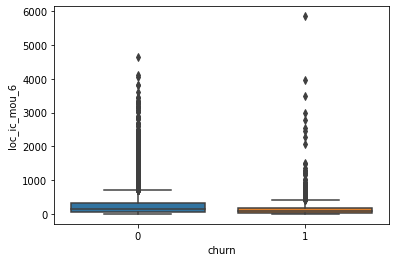

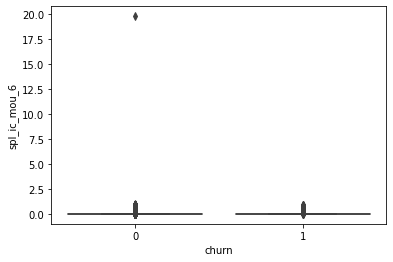

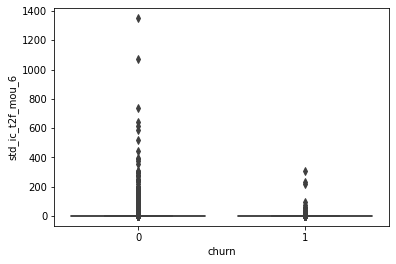

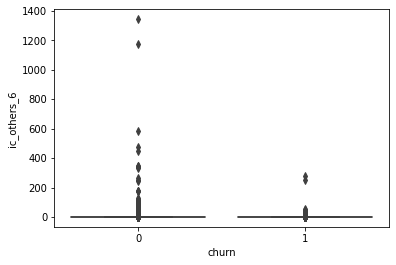

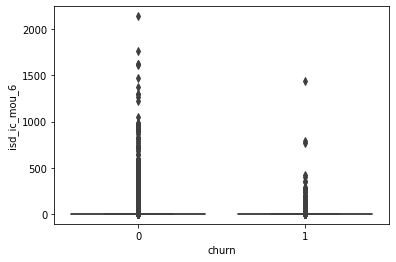

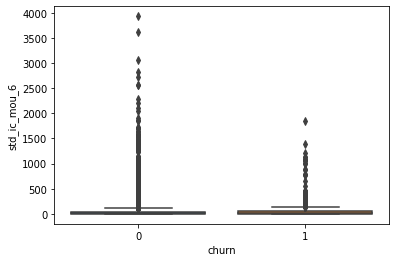

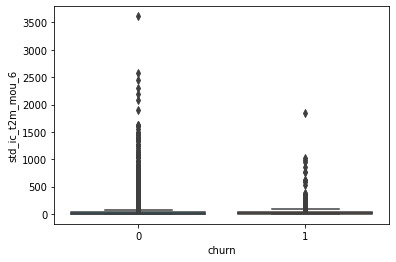

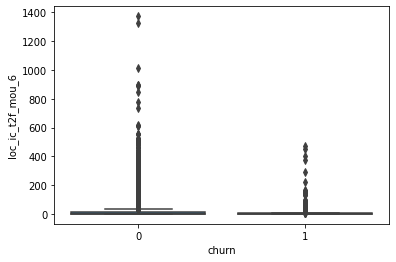

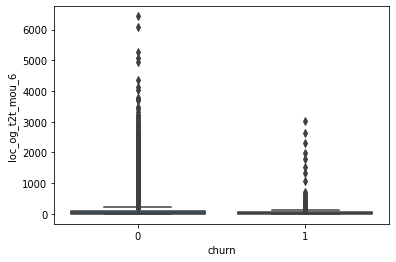

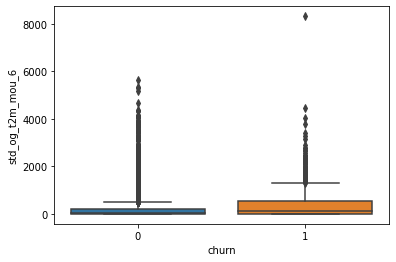

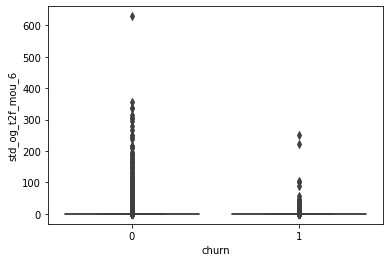

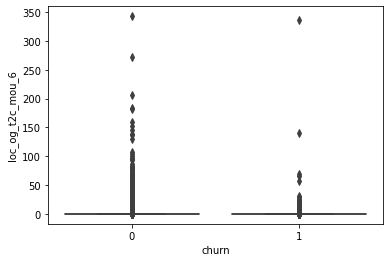

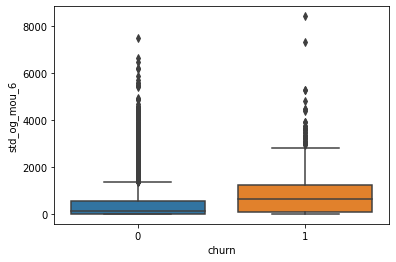

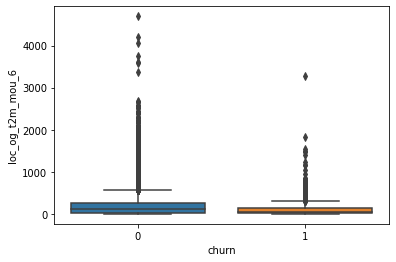

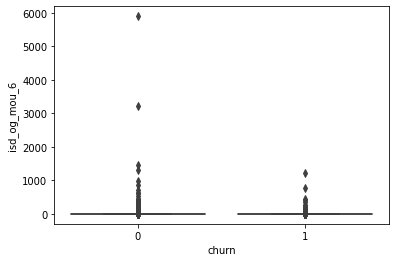

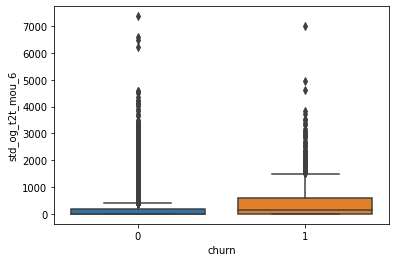

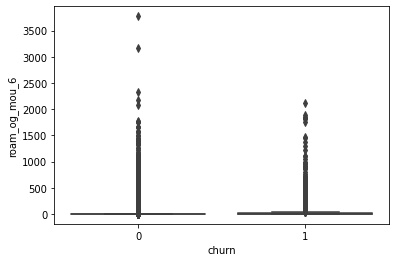

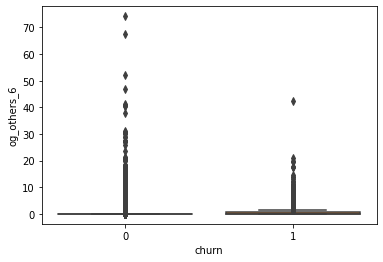

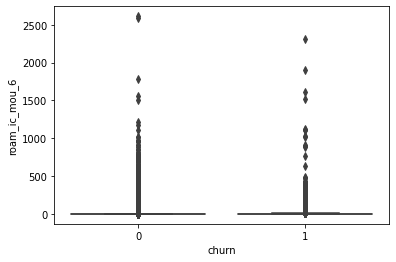

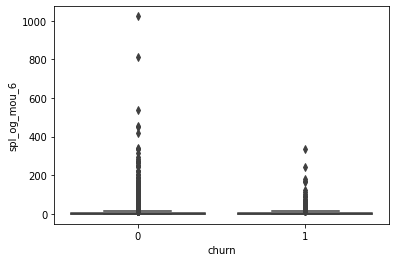

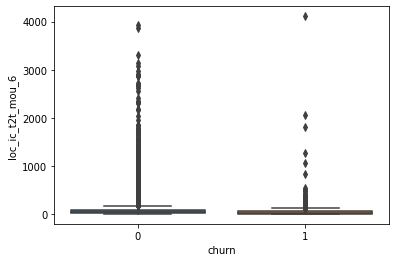

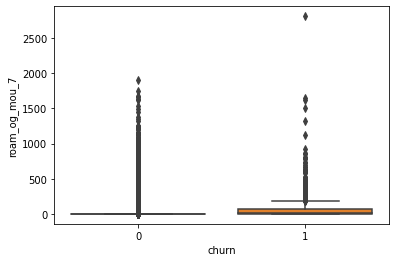

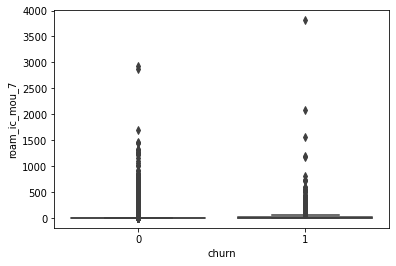

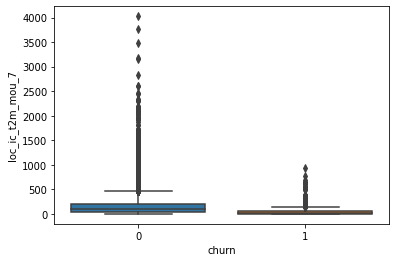

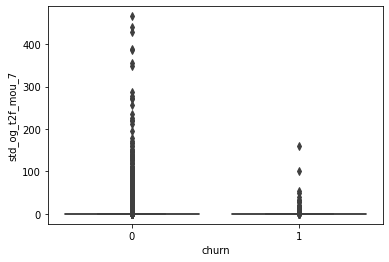

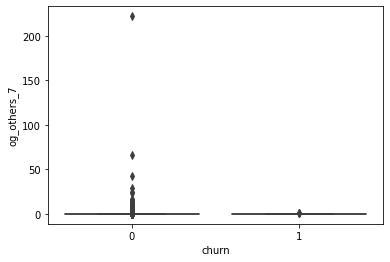

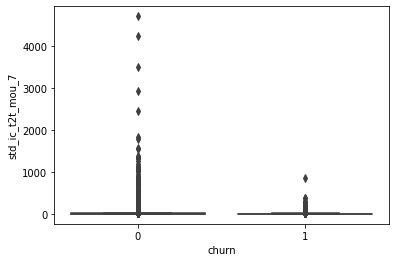

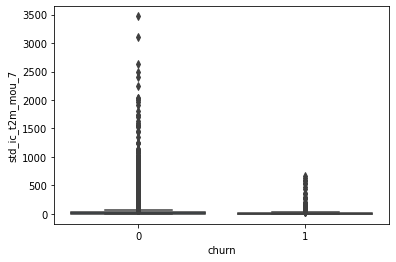

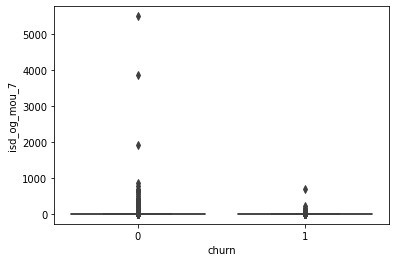

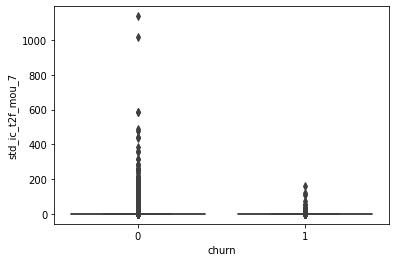

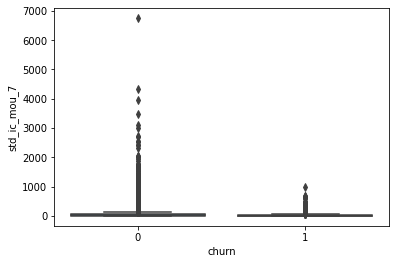

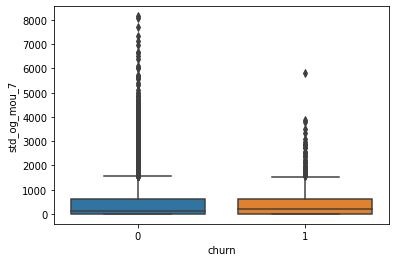

TypeError: Vertical orientation requires numeric `y` variable.

<Figure size 432x288 with 0 Axes>

In [1189]:
for _column in filtered_columns:
    plt.figure()
    sns.boxplot(y=_column, x='churn', data=filtered_data, orient='v')
    plt.show()

In [1190]:
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Data columns (total 90 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loc_ic_mou_6         20729 non-null  float64       
 1   spl_ic_mou_6         20729 non-null  float64       
 2   std_ic_t2t_mou_6     20729 non-null  float64       
 3   std_ic_t2f_mou_6     20729 non-null  float64       
 4   ic_others_6          20729 non-null  float64       
 5   isd_ic_mou_6         20729 non-null  float64       
 6   std_ic_mou_6         20729 non-null  float64       
 7   std_ic_t2m_mou_6     20729 non-null  float64       
 8   loc_ic_t2f_mou_6     20729 non-null  float64       
 9   loc_og_t2t_mou_6     20729 non-null  float64       
 10  std_og_t2m_mou_6     20729 non-null  float64       
 11  std_og_t2f_mou_6     20729 non-null  float64       
 12  loc_ic_t2m_mou_6     20729 non-null  float64       
 13  loc_og_mou_6         20729 non

#### Feature engineering: 

In [1191]:
filtered_data.date_of_last_rech_7.dtype

dtype('<M8[ns]')

In [1192]:
def filter_date_and_day(_data):
    for _column in _data.select_dtypes(include=['datetime64']).columns:
        _data[_column + '_year'] = _data[_column].dt.year 
        _data[_column + '_month'] = _data[_column].dt.month 
        _data[_column + '_day'] = _data[_column].dt.day
        _data.drop(columns=[_column], axis=1, inplace=True)
    return _data

filtered_data = filter_date_and_day(filtered_data)
filtered_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 12 to 69996
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loc_ic_mou_6               20729 non-null  float64
 1   spl_ic_mou_6               20729 non-null  float64
 2   std_ic_t2t_mou_6           20729 non-null  float64
 3   std_ic_t2f_mou_6           20729 non-null  float64
 4   ic_others_6                20729 non-null  float64
 5   isd_ic_mou_6               20729 non-null  float64
 6   std_ic_mou_6               20729 non-null  float64
 7   std_ic_t2m_mou_6           20729 non-null  float64
 8   loc_ic_t2f_mou_6           20729 non-null  float64
 9   loc_og_t2t_mou_6           20729 non-null  float64
 10  std_og_t2m_mou_6           20729 non-null  float64
 11  std_og_t2f_mou_6           20729 non-null  float64
 12  loc_ic_t2m_mou_6           20729 non-null  float64
 13  loc_og_mou_6               20729 non-null  fl

In [1193]:
filtered_data.select_dtypes(include=['datetime64']).columns

Index([], dtype='object')

In [1194]:
# remove rows whose rows has null values more than 80
filtered_data = filtered_data[~(filtered_data.apply(lambda x: sum(x.isnull().values), axis = 1)> 80)]

In [1195]:
filtered_data.shape

(20951, 94)

#### Standardise the data: 

In [1196]:
filtered_data.dropna(inplace=True)

In [1197]:
filtered_data.shape

(20535, 94)

In [1198]:
qar = filtered_data['loc_og_t2m_mou_6'].quantile(1.0)
filtered_data[ filtered_data['onnet_mou_7'] < qar].shape

(20515, 94)

In [1199]:
filtered_data.shape

(20535, 94)

In [1200]:
def quantile_percentage(data):  
    quantile = pd.DataFrame(columns=['col', '10','50','85','90','95','99','100','max'])
    for col in data.columns:
        _tmp = data[col].quantile([0.1,0.5,0.85,0.9,0.95,0.99,1.0])
        quantile = quantile.append({'col': col, 
                                    '10': str(round(_tmp[0.1],2)), 
                                    '50': str(round(_tmp[0.5],2)),
                                    '85': str(round(_tmp[0.85],2)),
                                    '90': str(round(_tmp[0.9],2)),
                                    '95': str(round(_tmp[0.95],2)),
                                    '99': str(round(_tmp[0.99],2)),
                                    '100': str(round(_tmp[1.0],2)),
                                   'max':max(data[col])}, ignore_index=True)
    return quantile

pd.set_option('display.max_rows', 500)
quantile_percentage(filtered_data.select_dtypes([np.number]))

col      10       50       85       90       95  \
0                loc_ic_mou_6   19.37   153.74   449.74   560.49   774.31   
1                spl_ic_mou_6     0.0      0.0     0.18     0.29     0.44   
2            std_ic_t2t_mou_6     0.0     1.16    21.96    34.36    65.05   
3            std_ic_t2f_mou_6     0.0      0.0     1.95     4.43    12.46   
4                 ic_others_6     0.0      0.0      0.5     1.21     3.73   
5                isd_ic_mou_6     0.0      0.0     4.61    14.83    44.42   
6                std_ic_mou_6     0.0    15.48    81.01   116.02   200.65   
7            std_ic_t2m_mou_6     0.0     7.33    50.81    73.83   125.81   
8            loc_ic_t2f_mou_6     0.0     2.09    26.06    39.92    74.85   
9            loc_og_t2t_mou_6    1.24    33.23   151.23   207.71   345.84   
10           std_og_t2m_mou_6     0.0    40.78   429.98   626.14   979.19   
11           std_og_t2f_mou_6     0.0      0.0     0.46      2.2     8.07   
12           loc_ic_t2m_mou_6   10.18    95.78   293.78   369.39   525.33   
13               loc_og_mou_6   13.97   169.48   527.35   659.89    941.4   
14           loc_og_t2c_mou_6     0.0      0.0      1.9     4.05     8.76   
15           loc_og_t2f_mou_6     0.0     0.38    11.59     18.6    34.09   
16               std_og_mou_6     0.0   136.83   898.93   1155.7  1574.81   
17           loc_og_t2m_mou_6    7.61   103.41   351.13   438.81   619.88   
18               isd_og_mou_6     0.0      0.0      0.0      0.0     1.05   
19           std_og_t2t_mou_6     0.0    14.51   426.59   644.18    989.7   
20               offnet_mou_6   59.06   288.96   743.94    927.1  1274.57   
21                onnet_mou_6   12.32   129.53   600.03   803.45  1166.35   
22              roam_og_mou_6     0.0      0.0    26.78    67.58    173.9   
23                og_others_6     0.0      0.0     1.33     2.31     4.19   
24              roam_ic_mou_6     0.0      0.0     12.5    33.57    96.36   
25               spl_og_mou_6     0.0     0.26    10.79    16.04    27.26   
26           loc_ic_t2t_mou_6    1.43    29.64   114.88    155.0   242.96   
27              roam_og_mou_7     0.0      0.0    12.71    41.98   124.04   
28                ic_others_7     0.0      0.0     0.68     1.61     4.75   
29               loc_og_mou_7   17.22   175.03   527.18   653.81   918.13   
30                onnet_mou_7   11.49   128.58   617.32   829.84  1214.16   
31               offnet_mou_7    60.9   287.66    761.8    938.0  1284.67   
32           loc_og_t2c_mou_7     0.0      0.0     2.28     4.81      9.8   
33           loc_og_t2f_mou_7     0.0     0.43    11.81    18.89    34.44   
34           loc_og_t2m_mou_7    9.28   106.84   347.72   438.29   607.06   
35              roam_ic_mou_7     0.0      0.0     5.04    18.98    64.57   
36           std_og_t2t_mou_7     0.0     15.4   456.09   674.54  1030.03   
37           loc_og_t2t_mou_7    1.48    33.93   150.76    209.3   347.44   
38           loc_ic_t2m_mou_7   13.23    98.79   289.87   365.37    514.3   
39               isd_ic_mou_7     0.0      0.0     6.31    17.94    50.65   
40           std_og_t2f_mou_7     0.0      0.0     0.36     2.16     7.68   
41           loc_ic_t2t_mou_7     2.0    30.76   116.01   156.98   237.02   
42           loc_ic_t2f_mou_7     0.0     2.36    27.29    41.96     77.1   
43               loc_ic_mou_7   24.08   157.23   447.73   557.42   777.98   
44                og_others_7     0.0      0.0      0.0      0.0      0.0   
45           std_ic_t2t_mou_7     0.0     1.31    22.99    35.56    65.77   
46               spl_og_mou_7     0.0     0.81    13.46    19.39    32.18   
47           std_ic_t2m_mou_7     0.0     7.83    52.97    76.08   130.45   
48               isd_og_mou_7     0.0      0.0      0.0      0.0     1.01   
49           std_ic_t2f_mou_7     0.0      0.0     2.06     4.68    12.73   
50           std_og_t2m_mou_7     0.0    40.24   457.34   657.43  1018.68   
51               std_i

In [1201]:
Q1 = filtered_data.quantile(0.05)
Q3 = filtered_data.quantile(0.99)
IQR = Q3 - Q1

filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data.shape

(19259, 94)

In [1202]:
X = filtered_data.drop(columns=['churn'], axis=1)
Y = filtered_data[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()


loc_ic_mou_6  spl_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2f_mou_6  \
12         -0.78         -0.44             -0.36             -0.25   
15         -0.01         -0.44             -0.37             -0.25   
23          0.59          0.41             -0.37             -0.25   
24         -0.04         -0.44             -0.37             -0.25   
25          0.51         -0.44             -0.37             -0.15   

    ic_others_6  isd_ic_mou_6  std_ic_mou_6  std_ic_t2m_mou_6  \
12        -0.22         -0.21         -0.43             -0.31   
15        -0.22         -0.21         -0.52             -0.43   
23        -0.22         -0.21          2.01              2.72   
24        -0.22         -0.21         -0.43             -0.32   
25        -0.22         -0.10         -0.19             -0.03   

    loc_ic_t2f_mou_6  loc_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
12             -0.41             -0.47              0.79             -0.21   
15             -0.41             -0.42             -0.52             -0.21   
23              0.58              4.13             -0.02             -0.21   
24             -0.41              0.03              0.41             -0.21   
25              0.36             -0.21              0.12             -0.21   

    loc_ic_t2m_mou_6  loc_og_mou_6  loc_og_t2c_mou_6  loc_og_t2f_mou_6  \
12             -0.65         -0.69             -0.30             -0.39   
15              0.31          0.16             -0.30             -0.19   
23             -0.17          2.02             -0.30              0.33   
24              0.07         -0.07             -0.30             -0.39   
25              0.37         -0.17             -0.30             -0.19   

    std_og_mou_6  loc_og_t2m_mou_6  isd_og_mou_6  std_og_t2t_mou_6  \
12          0.63             -0.58         -0.13              0.13   
15         -0.69              0.57         -0.13             -0.49   
23         -0.34             -0.43         -0.13             -0.49   
24         -0.05             -0.09         -0.13             -0.49   
25         -0.01             -0.07         -0.13             -0.13   

    offnet_mou_6  onnet_mou_6  roam_og_mou_6  og_others_6  roam_ic_mou_6  \
12          0.35        -0.11          -0.28        -0.36          -0.27   
15         -0.23        -0.66          -0.28        -0.31          -0.27   
23         -0.28         1.33          -0.28        -0.36          -0.27   
24          0.26        -0.47          -0.28        -0.36          -0.27   
25          0.01        -0.23          -0.28        -0.36          -0.27   

    spl_og_mou_6  loc_ic_t2t_mou_6  roam_og_mou_7  ic_others_7  loc_og_mou_7  \
12         -0.43             -0.57          -0.25        -0.23         -0.78   
15         -0.42             -0.45          -0.25        -0.23          0.28   
23         -0.43              1.54          -0.25        -0.19          1.68   
24         -0.43             -0.10          -0.25        -0.23         -0.06   
25         -0.43              0.45          -0.25        -0.23         -0.26   

    onnet_mou_7  offnet_mou_7  loc_og_t2c_mou_7  loc_og_t2f_mou_7  \
12        -0.43          0.68             -0.31             -0.39   
15        -0.62         -0.18             -0.31              0.27   
23         0.17          0.06             -0.31              1.16   
24        -0.59          0.19             -0.31             -0.39   
25        -0.40         -0.52             -0.31             -0.39   

    loc_og_t2m_mou_7  roam_ic_mou_7  std_og_t2t_mou_7  loc_og_t2t_mou_7  \
12             -0.74          -0.23             -0.25             -0.43   
15              0.66          -0.23             -0.49             -0.34   
23              1.08          -0.23             -0.49              1.52   
24              0.17          -0.23             -0.49             -0.27   
25             -0.29          -0.23             -0.37             -0.07   

    loc_ic_t2m_mou_7  isd_ic_mou_7  std_og_t2f_mou_7 

In [1203]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [1204]:
x_train.head()

loc_ic_mou_6  spl_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2f_mou_6  \
7728          -0.47         -0.44             -0.25             -0.25   
67397          0.39          0.60             -0.26              0.10   
12396          0.42          1.26             -0.35             -0.25   
29212         -0.53         -0.44             -0.34             -0.25   
30636          0.15         -0.44             -0.37             -0.25   

       ic_others_6  isd_ic_mou_6  std_ic_mou_6  std_ic_t2m_mou_6  \
7728         -0.22         -0.21         -0.39             -0.33   
67397        -0.20         -0.21         -0.36             -0.32   
12396         0.89         -0.21         -0.34             -0.21   
29212        -0.22         -0.21         -0.31             -0.19   
30636        -0.22         -0.21         -0.46             -0.35   

       loc_ic_t2f_mou_6  loc_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
7728              -0.41             -0.29             -0.30             -0.21   
67397              0.27             -0.40             -0.51             -0.21   
12396             -0.22             -0.29             -0.47             -0.21   
29212             -0.39             -0.45             -0.30             -0.21   
30636              0.63             -0.29             -0.51             -0.21   

       loc_ic_t2m_mou_6  loc_og_mou_6  loc_og_t2c_mou_6  loc_og_t2f_mou_6  \
7728              -0.33         -0.32              6.89             -0.39   
67397              0.68          1.45             -0.24             -0.30   
12396              0.84          0.24             -0.30             -0.18   
29212             -0.40         -0.71              3.86              0.34   
30636              0.06         -0.37             -0.30              0.84   

       std_og_mou_6  loc_og_t2m_mou_6  isd_og_mou_6  std_og_t2t_mou_6  \
7728          -0.28             -0.21         -0.13             -0.10   
67397         -0.60              2.41         -0.07             -0.36   
12396         -0.66              0.60         -0.13             -0.49   
29212         -0.40             -0.69         -0.13             -0.28   
30636         -0.68             -0.35         -0.13             -0.49   

       offnet_mou_6  onnet_mou_6  roam_og_mou_6  og_others_6  roam_ic_mou_6  \
7728          -0.37        -0.25          -0.28        -0.36          -0.27   
67397          0.75        -0.54          -0.28        -0.36          -0.27   
12396         -0.08        -0.61           0.13        -0.36           0.51   
29212         -0.58        -0.43           0.13        -0.36          -0.11   
30636         -0.63        -0.60          -0.09        -0.36          -0.10   

       spl_og_mou_6  loc_ic_t2t_mou_6  roam_og_mou_7  ic_others_7  \
7728           2.18             -0.42          -0.25        -0.23   
67397         -0.41             -0.37          -0.25        -0.23   
12396         -0.43             -0.43           0.09        -0.08   
29212          1.31             -0.42          -0.25        -0.14   
30636         -0.43              0.06          -0.25        -0.23   

       loc_og_mou_7  onnet_mou_7  offnet_mou_7  loc_og_t2c_mou_7  \
7728           0.08        -0.13          0.40              3.53   
67397          1.39        -0.43          0.53              0.93   
12396         -0.35        -0.66         -0.48             -0.31   
29212         -0.74        -0.39         -0.66             -0.31   
30636         -0.23        -0.55         -0.61             -0.31   

       loc_og_t2f_mou_7  loc_og_t2m_mou_7  roam_ic_mou_7  std_og_t2t_mou_7  \
7728              -0.39              0.48          -0.23              0.06   
67397              0.83              2.00          -0.23             -0.41   
12396             -0.39             -0.13           1.53             -0.49   
29212             -0.07             -0.71          -0.23             -0.21   
30636              1.60             -0.31          -0.23             -0.49   

  

### Modeling & Tuning:

In [1205]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-1.78719298e+00,  6.98046287e-01, -1.00809056e+00, ...,
         4.76567365e-16, -2.85710739e-16,  2.13587578e-16],
       [ 5.98348526e+00, -8.65055857e-01,  2.10909529e+00, ...,
        -5.99172167e-16, -4.96858224e-17,  2.35552091e-16],
       [ 1.50346696e+00, -1.54011230e+00,  4.26552937e+00, ...,
        -1.63828285e-16, -3.79913946e-16,  1.17073015e-16],
       ...,
       [-2.99156623e-01, -1.93304387e+00,  1.78180371e+00, ...,
        -8.00133561e-18,  1.00792800e-17,  4.32550909e-18],
       [ 7.60345177e+00,  1.69416486e+00, -2.80135570e+00, ...,
        -3.33485995e-17,  1.50070249e-17,  6.15720851e-18],
       [-3.04299576e-01, -2.72180715e+00,  5.89273923e+00, ...,
        -9.21126370e-18, -2.02785497e-18,  1.89552370e-17]])

In [1206]:
pca.components_.round(4)

array([[ 0.2492,  0.002 ,  0.0277, ..., -0.    , -0.    , -0.0069],
       [-0.0678,  0.0115,  0.0533, ...,  0.    ,  0.    ,  0.1061],
       [-0.1351, -0.035 ,  0.0341, ...,  0.    ,  0.    , -0.0737],
       ...,
       [-0.    , -0.    , -0.    , ..., -0.    , -0.    , -0.    ],
       [ 0.    ,  0.    , -0.    , ...,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  1.    ,  0.    ]])

In [1207]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

PC1   PC2           Feature
0 0.25 -0.07      loc_ic_mou_6
1 0.00  0.01      spl_ic_mou_6
2 0.03  0.05  std_ic_t2t_mou_6
3 0.07 -0.03  std_ic_t2f_mou_6
4 0.03  0.00       ic_others_6
5 0.04 -0.02      isd_ic_mou_6
6 0.06  0.05      std_ic_mou_6
7 0.06  0.04  std_ic_t2m_mou_6
8 0.13 -0.06  loc_ic_t2f_mou_6
9 0.14  0.01  loc_og_t2t_mou_6

In [1208]:
pca.explained_variance_ratio_.round(4)

array([0.1106, 0.1001, 0.0626, 0.0466, 0.0414, 0.0394, 0.0311, 0.0286,
       0.0272, 0.0251, 0.0244, 0.0234, 0.0222, 0.0202, 0.0189, 0.0177,
       0.0165, 0.0149, 0.0147, 0.0132, 0.0131, 0.0128, 0.0119, 0.0118,
       0.0114, 0.0112, 0.0109, 0.0107, 0.0101, 0.0096, 0.0092, 0.009 ,
       0.0087, 0.0085, 0.0081, 0.0079, 0.0077, 0.0073, 0.0071, 0.0069,
       0.0066, 0.0062, 0.0061, 0.0057, 0.0056, 0.0054, 0.0052, 0.0052,
       0.0048, 0.0041, 0.004 , 0.0039, 0.0037, 0.0035, 0.0035, 0.0034,
       0.0032, 0.003 , 0.0029, 0.0027, 0.0026, 0.0024, 0.0024, 0.0021,
       0.0021, 0.0018, 0.0016, 0.0011, 0.001 , 0.0006, 0.0006, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    ])

In [1209]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### we try to make 85 components to describe 95% of the components

In [1210]:
pca_final = IncrementalPCA(n_components=85)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(13481, 85)

#### Check correlation: 

In [1211]:
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=(40, 40))
sns.heatmap(corrmat, annot=True)

<AxesSubplot:>

#### There is no co-relation b/w the variables:

#### Transform the test data:

In [1212]:
pca_test_data = pca_final.transform(x_test)

In [1213]:
pca_test_data.shape

(5778, 85)

### Logistic regression with PCA:

In [1214]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)

In [1215]:
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]

In [1216]:
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.94'

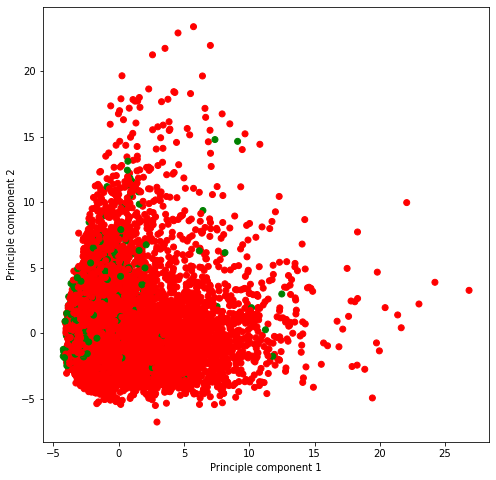

In [1217]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train['churn'].map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

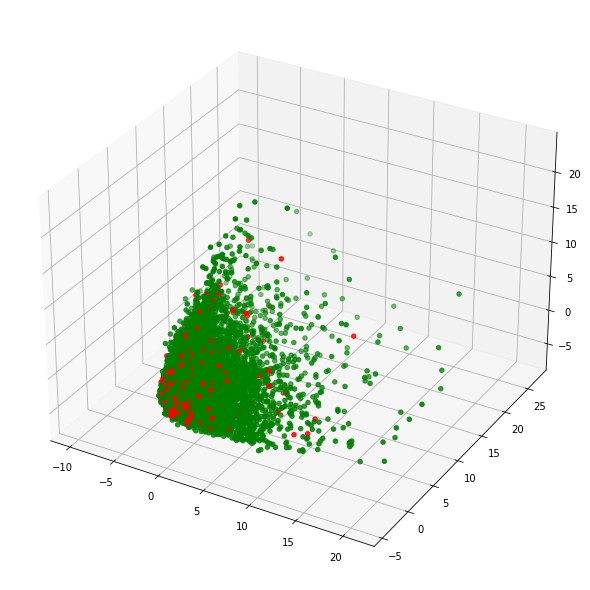

In [1218]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train['churn'].map({0:'green',1:'red'}))

In [1219]:
len(logistic_model.coef_[0])

85

In [1220]:
len(colnames)

93

In [1221]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

PC1   PC2           Feature
0 0.25 -0.07      loc_ic_mou_6
1 0.00  0.01      spl_ic_mou_6
2 0.03  0.05  std_ic_t2t_mou_6
3 0.07 -0.03  std_ic_t2f_mou_6
4 0.03  0.00       ic_others_6

In [1222]:
# result =  pd.DataFrame({'columns': colnames})
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

PC1   PC2             Feature  coeff
51  0.06  0.05        std_ic_mou_7  -1.11
22 -0.01  0.03       roam_og_mou_6  -0.72
62 -0.02 -0.01         sachet_2g_7  -0.55
0   0.25 -0.07        loc_ic_mou_6  -0.46
61  0.06 -0.05        monthly_3g_6  -0.44
35 -0.01  0.01       roam_ic_mou_7  -0.43
27 -0.02  0.03       roam_og_mou_7  -0.35
2   0.03  0.05    std_ic_t2t_mou_6  -0.35
70  0.16  0.18              arpu_7  -0.34
52 -0.05  0.29        std_og_mou_7  -0.33
4   0.03  0.00         ic_others_6  -0.26
49  0.07 -0.03    std_ic_t2f_mou_7  -0.26
31  0.09  0.20        offnet_mou_7  -0.25
25  0.01  0.06        spl_og_mou_6  -0.25
43  0.25 -0.06        loc_ic_mou_7  -0.23
55  0.07 -0.07          jun_vbc_3g  -0.21
33  0.12 -0.05    loc_og_t2f_mou_7  -0.21
44 -0.00  0.00         og_others_7  -0.17
9   0.14  0.01    loc_og_t2t_mou_6  -0.16
59  0.00 -0.02         sachet_3g_7  -0.14
72  0.07  0.28      total_og_mou_7  -0.14
48  0.02 -0.01        isd_og_mou_7  -0.12
40  0.05 -0.03    std_og_t2f_mou_7  -0.11
36 -0.06  0.21    std_og_t2t_mou_7  -0.11
54 -0.04  0.04   churn_probability  -0.10
50 -0.02  0.21    std_og_t2m_mou_7  -0.10
47  0.05  0.04    std_ic_t2m_mou_7  -0.10
63 -0.02 -0.01         sachet_2g_6  -0.09
17  0.21 -0.01    loc_og_t2m_mou_6  -0.07
46 -0.01  0.07        spl_og_mou_7  -0.07
15  0.12 -0.05    loc_og_t2f_mou_6  -0.07
74  0.25 -0.04      total_ic_mou_7  -0.06
66  0.06 -0.06        monthly_3g_7  -0.05
58  0.08 -0.09                 aon  -0.05
16 -0.04  0.28        std_og_mou_6  -0.04
69  0.16  0.17              arpu_6  -0.04
42  0.12 -0.06    loc_ic_t2f_mou_7  -0.04
12  0.22 -0.06    loc_ic_t2m_mou_6  -0.03
11  0.05 -0.02    std_og_t2f_mou_6  -0.03
10 -0.01  0.22    std_og_t2m_mou_6  -0.03
13  0.24 -0.00        loc_og_mou_6  -0.03
68  0.06 -0.07         vol_3g_mb_7  -0.02
24 -0.00  0.01       roam_ic_mou_6  -0.01
65  0.03 -0.06        monthly_2g_6  -0.01
5   0.04 -0.02        isd_ic_mou_6  -0.01
73  0.25 -0.05      total_ic_mou_6  -0.00
77  0.16  0.17    total_rech_amt_6  -0.00
78  0.15  0.17    total_rech_amt_7  -0.00
80  0.11 -0.05      max_rech_amt_7  -0.00
75  0.00  0.15    total_rech_num_6  -0.00
83 -0.00 -0.05         vol_2g_mb_6  -0.00
84 -0.00 -0.04         vol_2g_mb_7  -0.00
76 -0.01  0.14    total_rech_num_7  -0.00
81  0.09 -0.02  last_day_rch_amt_6  -0.00
82  0.09 -0.03  last_day_rch_amt_7   0.00
79  0.11 -0.05      max_rech_amt_6   0.00
38  0.23 -0.06    loc_ic_t2m_mou_7   0.00
53 -0.02 -0.00        spl_ic_mou_7   0.00
37  0.14  0.02    loc_og_t2t_mou_7   0.01
39  0.03 -0.01        isd_ic_mou_7   0.02
19 -0.05  0.20    std_og_t2t_mou_6   0.05
21  0.01  0.20         onnet_mou_6   0.05
60  0.00 -0.03         sachet_3g_6   0.07
41  0.16 -0.03    loc_ic_t2t_mou_7   0.07
34  0.22 -0.00    loc_og_t2m_mou_7   0.07
64  0.03 -0.07        monthly_2g_7   0.10
28  0.03  0.01         ic_others_7   0.11
18  0.02 -0.02        isd_og_mou_6   0.12
6   0.06  0.05        std_ic_mou_6   0.12
56  0.07 -0.07          jul_vbc_3g   0.12
32 -0.01  0.04    loc_og_t2c_mou_7   0.14
8   0.13 -0.06    loc_ic_t2f_mou_6   0.18
3   0.07 -0.03    std_ic_t2f_mou_6   0.19
1   0.00  0.01        spl_ic_mou_6   0.19
30  0.00  0.20         onnet_mou_7   0.21
14  0.01  0.03    loc_og_t2c_mou_6   0.22
20  0.10  0.19        offnet_mou_6   0.26
45  0.03  0.06    std_ic_t2t_mou_7   0.30
23  0.00  0.06         og_others_6   0.33
29  0.24  0.00        loc_og_mou_7   0.44
57  0.07 -0.07          aug_vbc_3g   0.47
67  0.00  0.00                  id   0.50
26  0.16 -0.03    loc_ic_t2t_mou_6   0.62
7   0.06  0.04    std_ic_t2m_mou_6   0.77
71  0.09  0.27      total_og_mou_6   1.02

## Random forest classifier with PCA:

In [1223]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(max_depth=4, max_features=8, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=60, n_jobs=-1)

In [1224]:
predictions = rfc.predict(pca_test_data)

In [1225]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5465
           1       0.00      0.00      0.00       313

    accuracy                           0.95      5778
   macro avg       0.47      0.50      0.49      5778
weighted avg       0.89      0.95      0.92      5778



In [1226]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.95

In [1227]:
print(confusion_matrix(y_test, predictions))

[[5465    0]
 [ 313    0]]


In [1228]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [1229]:
predicted_proba[:10].round(3)

array([0.794, 0.008, 0.008, 0.011, 0.886, 0.   , 0.   , 0.435, 0.028,
       0.004])

In [1230]:
print(confusion_matrix(y_test, predictions))

[[5465    0]
 [ 313    0]]


In [1231]:
metrics.roc_auc_score(y_test, predicted_proba)

0.9397782578067223

#### Observation:

**Though there is a accurasy of 94% it's not able to identify the churned users.**
**it's because of class imbalance**
**We will try to reduce the class imbalance using imblearn different techniques**

### Sampling :

In [1232]:
# !pip install imblearn
# !pip install imbalanced-learn
import imblearn


In [1233]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0) #return_indices=True
x_rus, y_run = rus.fit_resample(x_train, y_train)

In [1234]:
x_rus.shape

(1372, 93)

In [1235]:
y_run.sum()

churn    686
dtype: int64

Note: There may be a chance of loosing the data with under sampling

### Over sampling: 

In [1236]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

x_ros, y_ros = ros.fit_resample(df_train_pca, y_train) #, ind
x_test_ros, y_test_ros = ros.fit_resample(pca_test_data, y_test)

In [1237]:
x_ros.shape

(25590, 85)

In [1238]:
y_ros.sum()

churn    12795
dtype: int64

In [1239]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [1240]:
rfe_algo = fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      5465
           1       0.90      0.79      0.84      5465

    accuracy                           0.85     10930
   macro avg       0.86      0.85      0.85     10930
weighted avg       0.86      0.85      0.85     10930

0.8505946935041171
[[4971  494]
 [1139 4326]]


**Observation: There is a overfit in the data set from the result we can see**

### Oversampling followed by under sampling:

In [1241]:
from imblearn.over_sampling import SMOTE
smt = SMOTE() 
x_smt_train, y_smt_train = smt.fit_resample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_resample(pca_test_data, y_test)

In [1242]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5465
           1       0.92      0.81      0.86      5465

    accuracy                           0.87     10930
   macro avg       0.88      0.87      0.87     10930
weighted avg       0.88      0.87      0.87     10930

0.8718206770356816
[[5080  385]
 [1016 4449]]


In [1243]:
rfe_algo.feature_importances_.round(3)

array([0.061, 0.021, 0.005, 0.009, 0.001, 0.002, 0.003, 0.207, 0.003,
       0.037, 0.019, 0.003, 0.001, 0.007, 0.008, 0.003, 0.001, 0.001,
       0.003, 0.007, 0.004, 0.001, 0.04 , 0.175, 0.001, 0.085, 0.103,
       0.087, 0.002, 0.025, 0.002, 0.002, 0.01 , 0.001, 0.002, 0.002,
       0.002, 0.016, 0.004, 0.   , 0.   , 0.001, 0.002, 0.   , 0.   ,
       0.001, 0.003, 0.   , 0.   , 0.002, 0.   , 0.   , 0.001, 0.   ,
       0.002, 0.   , 0.   , 0.001, 0.   , 0.003, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.001,
       0.01 , 0.   , 0.001, 0.   , 0.002, 0.   , 0.   , 0.   , 0.001,
       0.   , 0.   , 0.   , 0.   ])

### Over sampling with under sampling with logistic regression: 

In [1244]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return log

In [1245]:
log_alg = fit_logistic_regression(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

95.3


In [1246]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [1247]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

ChurnProbability  y_train
0              0.02        0
1              0.00        0
2              0.28        0
3              0.00        0
4              0.01        0
5              0.03        0
6              0.02        0
7              0.03        0
8              0.75        0
9              0.29        0

In [1248]:
log_alg.classes_

array([0, 1], dtype=int64)

In [1249]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    print(cm)
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

[[    0 12795]
 [    0 12795]]
[[ 8229  4566]
 [  122 12673]]
[[10061  2734]
 [  357 12438]]
[[10982  1813]
 [  685 12110]]
[[11487  1308]
 [ 1015 11780]]
[[11742  1053]
 [ 1313 11482]]
[[11949   846]
 [ 1767 11028]]
[[12122   673]
 [ 2264 10531]]
[[12270   525]
 [ 2992  9803]]
[[12473   322]
 [ 4011  8784]]


prob  accuracy  sensitivity  specificity
0.00  0.00      0.50         1.00         0.00
0.10  0.10      0.82         0.99         0.64
0.20  0.20      0.88         0.97         0.79
0.30  0.30      0.90         0.95         0.86
0.40  0.40      0.91         0.92         0.90
0.50  0.50      0.91         0.90         0.92
0.60  0.60      0.90         0.86         0.93
0.70  0.70      0.89         0.82         0.95
0.80  0.80      0.86         0.77         0.96
0.90  0.90      0.83         0.69         0.97

In [1250]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

<AxesSubplot:xlabel='prob'>

In [1251]:
_percentage

array([2.26541258e-02, 2.87404719e-04, 2.77379772e-01, ...,
       9.91948412e-01, 4.65617235e-01, 3.01410103e-01])

In [1252]:
_test_percentage = log_alg.predict_proba(x_smt_test)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': log_alg.predict_proba(x_smt_test)[:,1]})
test_churn_predicted['y_test'] = y_smt_test
test_churn_predicted['0.55_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted['0.65_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.65 else 0)
test_churn_predicted['0.60_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.6 else 0)
test_churn_predicted.head(10)

ChurnProbability  y_test  0.55_predict  0.65_predict  0.60_predict
0              0.99       1             1             1             1
1              0.03       0             0             0             0
2              0.05       0             0             0             0
3              0.16       0             0             0             0
4              0.99       1             1             1             1
5              0.00       0             0             0             0
6              0.00       0             0             0             0
7              0.98       1             1             1             1
8              0.32       0             0             0             0
9              0.02       0             0             0             0

In [1253]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.65_predict'])
cm

array([[5121,  344],
       [1115, 4350]], dtype=int64)

In [1254]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.60_predict'])
cm

array([[5087,  378],
       [ 995, 4470]], dtype=int64)

In [1255]:
cm = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.55_predict'])
cm

array([[5040,  425],
       [ 887, 4578]], dtype=int64)

##### **Has an accuracy of 91.5**

In [1256]:
_percentage = log_alg.predict_proba(x_smt_test)[:,1]

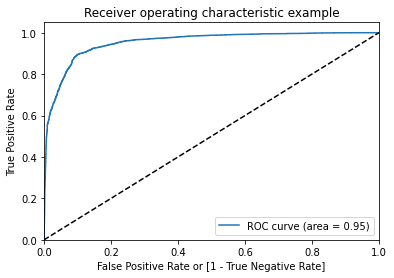

In [1257]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_smt_test, _percentage)


In [1258]:
log_alg.coef_.round(2)

array([[-0.64,  0.27, -0.46,  0.21, -0.35,  0.06,  0.15,  0.93,  0.08,
        -0.28, -0.04,  0.01, -0.06, -0.04,  0.31, -0.12,  0.08, -0.26,
         0.12,  0.02,  0.39,  0.11, -0.79,  0.36, -0.01, -0.33,  0.74,
        -0.43, -0.08,  0.52,  0.19, -0.2 , -0.11, -0.12, -0.  , -0.44,
        -0.19,  0.11, -0.15, -0.02, -0.16,  0.02, -0.02, -0.1 , -0.13,
         0.23, -0.29, -0.1 , -0.23, -0.17, -0.07, -1.46, -0.47,  0.07,
        -0.26, -0.25,  0.06,  0.43, -0.15,  0.05, -0.07, -0.32, -0.65,
        -0.02,  0.11, -0.04, -0.04,  0.39,  0.14, -0.11, -0.76,  0.9 ,
        -1.87, -0.08, -0.25,  0.  , -0.  , -0.  , -0.  , -0.  , -0.  ,
         0.  , -0.  ,  0.  , -0.  ]])

In [1259]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

PC1   PC2             Feature  coeff  sampling_coeff
72  0.07  0.28      total_og_mou_7  -0.14           -1.87
51  0.06  0.05        std_ic_mou_7  -1.11           -1.46
7   0.06  0.04    std_ic_t2m_mou_6   0.77            0.93
71  0.09  0.27      total_og_mou_6   1.02            0.90
22 -0.01  0.03       roam_og_mou_6  -0.72           -0.79
70  0.16  0.18              arpu_7  -0.34           -0.76
26  0.16 -0.03    loc_ic_t2t_mou_6   0.62            0.74
62 -0.02 -0.01         sachet_2g_7  -0.55           -0.65
0   0.25 -0.07        loc_ic_mou_6  -0.46           -0.64
29  0.24  0.00        loc_og_mou_7   0.44            0.52
52 -0.05  0.29        std_og_mou_7  -0.33           -0.47
2   0.03  0.05    std_ic_t2t_mou_6  -0.35           -0.46
35 -0.01  0.01       roam_ic_mou_7  -0.43           -0.44
27 -0.02  0.03       roam_og_mou_7  -0.35           -0.43
57  0.07 -0.07          aug_vbc_3g   0.47            0.43
20  0.10  0.19        offnet_mou_6   0.26            0.39
67  0.00  0.00                  id   0.50            0.39
23  0.00  0.06         og_others_6   0.33            0.36
4   0.03  0.00         ic_others_6  -0.26           -0.35
25  0.01  0.06        spl_og_mou_6  -0.25           -0.33
61  0.06 -0.05        monthly_3g_6  -0.44           -0.32
14  0.01  0.03    loc_og_t2c_mou_6   0.22            0.31
46 -0.01  0.07        spl_og_mou_7  -0.07           -0.29
9   0.14  0.01    loc_og_t2t_mou_6  -0.16           -0.28
1   0.00  0.01        spl_ic_mou_6   0.19            0.27
17  0.21 -0.01    loc_og_t2m_mou_6  -0.07           -0.26
54 -0.04  0.04   churn_probability  -0.10           -0.26
74  0.25 -0.04      total_ic_mou_7  -0.06           -0.25
55  0.07 -0.07          jun_vbc_3g  -0.21           -0.25
45  0.03  0.06    std_ic_t2t_mou_7   0.30            0.23
48  0.02 -0.01        isd_og_mou_7  -0.12           -0.23
3   0.07 -0.03    std_ic_t2f_mou_6   0.19            0.21
31  0.09  0.20        offnet_mou_7  -0.25           -0.20
30  0.00  0.20         onnet_mou_7   0.21            0.19
36 -0.06  0.21    std_og_t2t_mou_7  -0.11           -0.19
49  0.07 -0.03    std_ic_t2f_mou_7  -0.26           -0.17
40  0.05 -0.03    std_og_t2f_mou_7  -0.11           -0.16
6   0.06  0.05        std_ic_mou_6   0.12            0.15
38  0.23 -0.06    loc_ic_t2m_mou_7   0.00           -0.15
58  0.08 -0.09                 aon  -0.05           -0.15
68  0.06 -0.07         vol_3g_mb_7  -0.02            0.14
44 -0.00  0.00         og_others_7  -0.17           -0.13
15  0.12 -0.05    loc_og_t2f_mou_6  -0.07           -0.12
33  0.12 -0.05    loc_og_t2f_mou_7  -0.21           -0.12
18  0.02 -0.02        isd_og_mou_6   0.12            0.12
69  0.16  0.17              arpu_6  -0.04           -0.11
21  0.01  0.20         onnet_mou_6   0.05            0.11
37  0.14  0.02    loc_og_t2t_mou_7   0.01            0.11
32 -0.01  0.04    loc_og_t2c_mou_7   0.14           -0.11
64  0.03 -0.07        monthly_2g_7   0.10            0.11
43  0.25 -0.06        loc_ic_mou_7  -0.23           -0.10
47  0.05  0.04    std_ic_t2m_mou_7  -0.10           -0.10
73  0.25 -0.05      total_ic_mou_6  -0.00           -0.08
16 -0.04  0.28        std_og_mou_6  -0.04            0.08
8   0.13 -0.06    loc_ic_t2f_mou_6   0.18            0.08
28  0.03  0.01         ic_others_7   0.11           -0.08
50 -0.02  0.21    std_og_t2m_mou_7  -0.10           -0.07
53 -0.02 -0.00        spl_ic_mou_7   0.00            0.07
60  0.00 -0.03         sachet_3g_6   0.07           -0.07
5   0.04 -0.02        isd_ic_mou_6  -0.01            0.06
12  0.22 -0.06    loc_ic_t2m_mou_6  -0.03           -0.06
56  0.07 -0.07          jul_vbc_3g   0.12            0.06
59  0.00 -0.02         sachet_3g_7  -0.14            0.05
13  0.24 -0.00        loc_og_mou_6  -0.03           -0.04
10 -0.01  0.22    std_og_t2m_mou_6  -0.03           -0.04
66  0.06 -0.06        monthly_3g_7  -0.05           -0.04
65  0.03 -0.06        monthly_2g_6  -0.01           -0.04
39  0.03 -0.01        isd_ic_mou_7   0.02           -0.02
19 

### Random Forest:

In [1260]:
# x_smt_train, x_smt_test, y_smt_train, y_smt_test

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5465
           1       0.92      0.85      0.88      5465

    accuracy                           0.88     10930
   macro avg       0.89      0.88      0.88     10930
weighted avg       0.89      0.88      0.88     10930

[[5041  424]
 [ 842 4623]]


In [1261]:
x_smt_test

array([[-3.05857089e+00,  6.82899326e-01, -1.27393672e+00, ...,
         1.07512446e-05, -4.18034637e-06,  3.06166822e-06],
       [ 1.01838349e+00, -9.65879002e-01, -2.37314385e+00, ...,
         7.35519006e-07,  6.44970869e-06, -7.27556975e-06],
       [-4.30820378e-01, -2.35062856e+00,  5.29701350e+00, ...,
         3.97626124e-06,  1.79532895e-05,  3.96729109e-06],
       ...,
       [-3.76925228e+00,  4.94894069e-01, -8.34372962e-01, ...,
         6.17393309e-06, -5.04188899e-06,  7.62730343e-06],
       [-2.89776601e+00,  5.54263149e-02, -2.12861377e-01, ...,
        -1.48889217e-05,  6.45219342e-06,  6.02698980e-06],
       [-2.96738705e+00, -7.70513167e-02, -1.07438818e+00, ...,
         3.87001662e-07,  1.37710003e-05,  4.60454746e-07]])

In [1262]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [1263]:
r_model = RandomForestClassifier()
params = {
    'max_features': range(30, 40, 5),
    'n_estimators': [40],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(100, 150, 25),
    'max_depth': [7, 8, 9]
}

folds = KFold(n_splits=2, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_smt_train, y_smt_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'max_features': range(30, 40, 5),
                         'min_samples_leaf': range(100, 150, 25),
                         'min_samples_split': range(100, 150, 25),
                         'n_estimators': [40]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [1264]:
results = pd.DataFrame(grid_cv1.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            9.41          0.76             0.07            0.01   
1            8.60          0.16             0.08            0.00   
2            9.08          1.07             0.08            0.01   
3            9.18          0.91             0.08            0.00   
4           11.02          0.78             0.08            0.01   
5           10.61          0.09             0.07            0.01   
6           10.52          1.10             0.08            0.00   
7           10.63          0.84             0.08            0.00   
8           10.48          0.68             0.08            0.00   
9            9.49          0.15             0.08            0.00   
10           9.80          0.76             0.08            0.01   
11           9.57          0.93             0.07            0.00   
12          11.91          0.74             0.07            0.00   
13          11.54          0.96             0.06            0.02   
14          11.64          0.49             0.07            0.01   
15          10.82          0.39             0.07            0.00   
16           9.88          0.59             0.07            0.00   
17          10.32          0.78             0.08            0.01   
18           9.31          0.12             0.08            0.01   
19           9.54          0.01             0.08            0.00   
20           9.65          0.06             0.05            0.00   
21           8.80          0.08             0.04            0.00   
22           8.23          0.20             0.04            0.00   
23           8.04          0.11             0.03            0.00   

   param_max_depth param_max_features param_min_samples_leaf  \
0                7                 30                    100   
1                7                 30                    100   
2                7                 30                    125   
3                7                 30                    125   
4                7                 35                    100   
5                7                 35                    100   
6                7                 35                    125   
7                7                 35                    125   
8                8                 30                    100   
9                8                 30                    100   
10               8                 30                    125   
11               8                 30                    125   
12               8                 35                    100   
13               8                 35                    100   
14               8                 35                    125   
15               8                 35                    125   
16               9                 30                    100   
17               9                 30                    100   
18               9                 30                    125   
19               9                 30                    125   
20               9                 35                    100   
21               9                 35                    100   
22               9                 35                    125   
23               9                 35                    125   

   param_min_samples_split param_n_estimators  \
0                      100                 40   
1                      125                 40   
2                      100                 40   
3                      125                 40   
4                      100                 40   
5                      125                 40   
6                      100                 40   
7                      125                 40   
8                      100                 40   
9                      125                 40   
10                     100                 40   
11                     125                 40   
12                     100                 40   
13              

In [1265]:
grid_cv1.best_params_

{'max_depth': 9,
 'max_features': 30,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 40}

In [1266]:
best_estimator = grid_cv1.best_estimator_

In [1267]:
best_estimator.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = best_estimator.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5465
           1       0.92      0.84      0.88      5465

    accuracy                           0.88     10930
   macro avg       0.89      0.88      0.88     10930
weighted avg       0.89      0.88      0.88     10930

[[5037  428]
 [ 849 4616]]


In [1268]:
best_estimator.feature_importances_.round(3)

array([0.072, 0.014, 0.002, 0.005, 0.002, 0.008, 0.003, 0.315, 0.002,
       0.009, 0.006, 0.002, 0.001, 0.003, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.005, 0.005, 0.039, 0.175, 0.   , 0.052, 0.123,
       0.055, 0.001, 0.007, 0.001, 0.001, 0.008, 0.   , 0.003, 0.001,
       0.001, 0.008, 0.014, 0.   , 0.   , 0.002, 0.006, 0.001, 0.   ,
       0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.002, 0.   , 0.   ,
       0.001, 0.   , 0.   , 0.001, 0.   , 0.001, 0.001, 0.001, 0.   ,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
       0.019, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.002,
       0.   , 0.   , 0.   , 0.   ])

### Observation: 

### **From the observation we can see that PCA with Logistic regression has balanced specificity and recall**

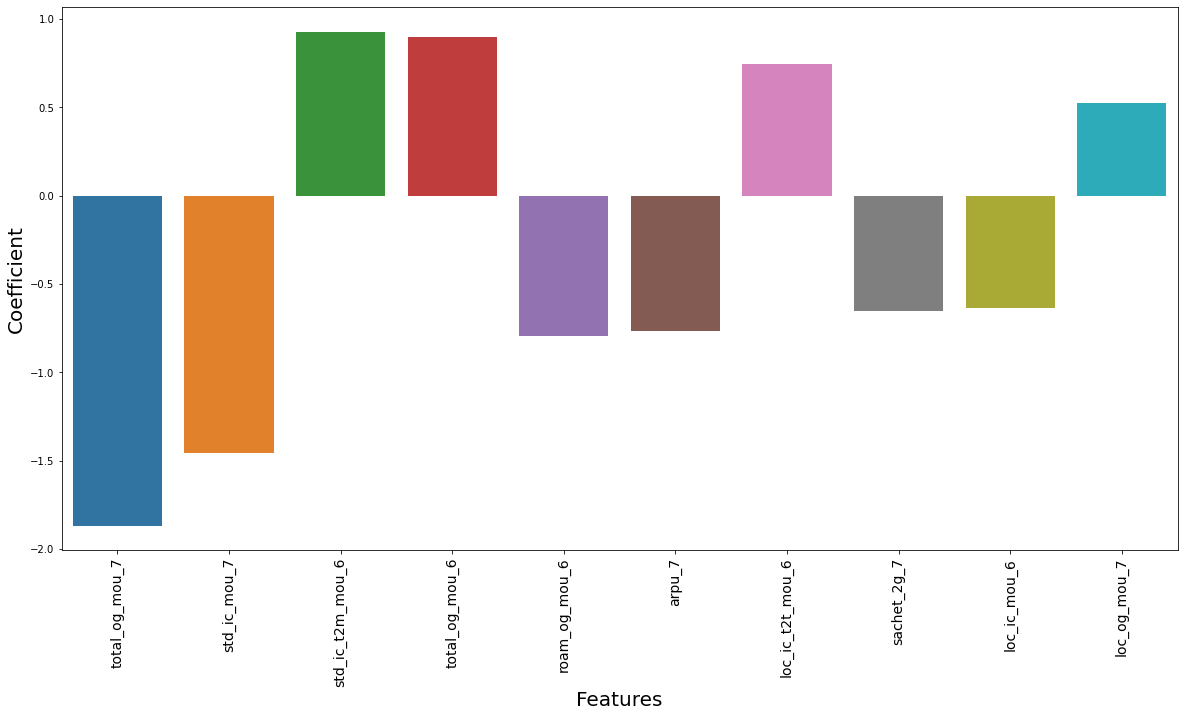

In [1269]:
pca_column_frame

plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

#### From the below observations we can derive the top features that can impact the churn: 

* Outgoing others 
* Roaming outgoing minutes of usage
* STD incoming  minutes of usage
* STD incoming Operator T to other operator mobile
* Roaming Outgoing minutes of usage
* Average revenue per user
* local incoming Operator T to T (within same operator) minutes of usage
* Service schemes with validity smaller than a month
* Local outgoing minutes of usage

In [1270]:
telecom_churn_test = pd.read_csv('test.csv')
telecom_churn_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109            0.00            0.00            0.00   
1  70000        109            0.00            0.00            0.00   
2  70001        109            0.00            0.00            0.00   
3  70002        109            0.00            0.00            0.00   
4  70003        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.88   
1            6/30/2014            7/31/2014            8/31/2014  414.17   
2            6/30/2014            7/31/2014            8/31/2014  329.84   
3            6/30/2014            7/31/2014            8/31/2014   43.55   
4            6/30/2014            7/31/2014            8/31/2014  306.85   

   arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.33   64.44        31.78        20.23        23.11         60.16   
1  515.57  360.87        75.51        41.21        19.84        474.34   
2  434.88  746.24         7.54         7.86         8.40         16.98   
3  171.39   24.40         5.31         2.16         0.00         40.04   
4  406.29  413.33       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.03         43.01   
1              0.00              0.00              0.00        549.86   
2              0.00              0.00              0.00          0.00   
3              0.00              6.18              0.00          8.26   
4              0.00              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

   std_og_t2t_mou_8

In [1271]:
telecom_churn_test.shape

(30000, 171)

In [1272]:
telecom_churn_test.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [1273]:
churn_id = telecom_churn_test['id']
churn_id

0        69999
1        70000
2        70001
3        70002
4        70003
         ...  
29995    99994
29996    99995
29997    99996
29998    99997
29999    99998
Name: id, Length: 30000, dtype: int64

In [1274]:
telecom_churn_test['tenure'] = (telecom_churn_test['aon']/30).round(0)
telecom_churn_test["avg_arpu_6_7"]= (telecom_churn_test['arpu_6']+telecom_churn_test['arpu_7'])/2
telecom_churn_test['churn_probability'] = 0
telecom_churn_test['good_phase_recharge'] = telecom_churn_test['total_rech_amt_6'] + telecom_churn_test['total_rech_amt_7']

_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for i in _columns:
    telecom_churn_test[i] = pd.to_datetime(telecom_churn_test[i], infer_datetime_format=True)
    
filter_test_data = filter_date_and_day(telecom_churn_test[_columns])
telecom_churn_test = pd.concat([telecom_churn_test, filter_test_data], axis=1)

In [1275]:
telecom_churn_test = telecom_churn_test[X.columns]

In [1276]:
churn_test_null = telecom_churn_test.isnull().sum().sum() / np.product(telecom_churn_test.shape) * 100
churn_test_null

2.3772043010752686

In [1277]:
for col in telecom_churn_test.columns:
    null_col = telecom_churn_test[col].isnull().sum() / telecom_churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

loc_ic_mou_6 : 3.90
spl_ic_mou_6 : 3.90
std_ic_t2t_mou_6 : 3.90
std_ic_t2f_mou_6 : 3.90
ic_others_6 : 3.90
isd_ic_mou_6 : 3.90
std_ic_mou_6 : 3.90
std_ic_t2m_mou_6 : 3.90
loc_ic_t2f_mou_6 : 3.90
loc_og_t2t_mou_6 : 3.90
std_og_t2m_mou_6 : 3.90
std_og_t2f_mou_6 : 3.90
loc_ic_t2m_mou_6 : 3.90
loc_og_mou_6 : 3.90
loc_og_t2c_mou_6 : 3.90
loc_og_t2f_mou_6 : 3.90
std_og_mou_6 : 3.90
loc_og_t2m_mou_6 : 3.90
isd_og_mou_6 : 3.90
std_og_t2t_mou_6 : 3.90
offnet_mou_6 : 3.90
onnet_mou_6 : 3.90
roam_og_mou_6 : 3.90
og_others_6 : 3.90
roam_ic_mou_6 : 3.90
spl_og_mou_6 : 3.90
loc_ic_t2t_mou_6 : 3.90
roam_og_mou_7 : 3.91
ic_others_7 : 3.91
loc_og_mou_7 : 3.91
onnet_mou_7 : 3.91
offnet_mou_7 : 3.91
loc_og_t2c_mou_7 : 3.91
loc_og_t2f_mou_7 : 3.91
loc_og_t2m_mou_7 : 3.91
roam_ic_mou_7 : 3.91
std_og_t2t_mou_7 : 3.91
loc_og_t2t_mou_7 : 3.91
loc_ic_t2m_mou_7 : 3.91
isd_ic_mou_7 : 3.91
std_og_t2f_mou_7 : 3.91
loc_ic_t2t_mou_7 : 3.91
loc_ic_t2f_mou_7 : 3.91
loc_ic_mou_7 : 3.91
og_others_7 : 3.91
std_ic_t2t_mou

In [1278]:
for col in telecom_churn_test.columns:
    null_col = telecom_churn_test[col].isnull().sum() / telecom_churn_test.shape[0] * 100
    if null_col > 0:
        telecom_churn_test[col] = telecom_churn_test[col].fillna(telecom_churn_test[col].mode()[0])

In [1279]:
telecom_churn_test.isnull().sum().sum()

0

In [1280]:
churn_test_final = pca_final.transform(telecom_churn_test)

In [1281]:
churn_test_final.shape

(30000, 85)

In [1282]:
predict_probalbilty = best_estimator.predict(churn_test_final)

In [1283]:
predict_probalbilty.shape

(30000,)

In [1284]:
final_churn_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probalbilty})

In [1285]:
final_churn_prediction['churn_probability'].value_counts()

0    29510
1      490
Name: churn_probability, dtype: int64

In [1287]:

final_churn_prediction.to_csv('./submission.csv',index=False)